In [5]:
from collections import defaultdict
from datetime import datetime
import glob
import math
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import pandas as pd
import time

In [47]:
#read in data, there are lots of data, I use all data from 201801 to 201806, there seems to be some column missing for 2017
df_01 = pd.read_csv('data/201801-fordgobike-tripdata.csv')
df_02 = pd.read_csv('data/201802-fordgobike-tripdata.csv')
df_03 = pd.read_csv('data/201803-fordgobike-tripdata.csv')
df_04 = pd.read_csv('data/201804-fordgobike-tripdata.csv')
df_05 = pd.read_csv('data/201805-fordgobike-tripdata.csv')
df_06 = pd.read_csv('data/201806-fordgobike-tripdata.csv')

In [7]:
path = r'/Users/bettychou1993/Desktop/Jobs/GG_DS analyst/data'
df_all = pd.concat([pd.read_csv(f, sep=',') for f in glob.glob(path + "/*.csv")],ignore_index=True)

In [8]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819164 entries, 0 to 819163
Data columns (total 16 columns):
duration_sec               819164 non-null int64
start_time                 819164 non-null object
end_time                   819164 non-null object
start_station_id           817103 non-null float64
start_station_name         817103 non-null object
start_station_latitude     819164 non-null float64
start_station_longitude    819164 non-null float64
end_station_id             817103 non-null float64
end_station_name           817103 non-null object
end_station_latitude       819164 non-null float64
end_station_longitude      819164 non-null float64
bike_id                    819164 non-null int64
user_type                  819164 non-null object
member_birth_year          760467 non-null float64
member_gender              760690 non-null object
bike_share_for_all_trip    819164 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 100.0+ MB


# 1. Average, standard deviation, general distribution of trip duration 

Take-away 1: The median duration time is about 9 min, and the mean is about 15 min. Users use the bike for about 10-15 minutes, which is the reasonable time range for commuting.  

In [9]:
df_all['duration_sec'].describe()

count    819164.000000
mean        879.605099
std        2576.385421
min          61.000000
25%         350.000000
50%         554.000000
75%         870.000000
max       86366.000000
Name: duration_sec, dtype: float64

# 2. What are the busiest dates and times?

Take-away 2: Since the trip duration is around 9-15 min, we only consider the start time to find the busiest dates and times.  From the table below, the busiest date throughout the first half year of 2018 is on 2018-06-26 with 8,282 counts of rides. And from the two figures below, the popular weekday for users to use the bike is from Tuesday to Thursday, and during commuter time/ rush hours.

In [14]:
df_all['start_time'] = pd.to_datetime(df_all['start_time'])
df_all['start_time_date'] = df_all['start_time'].dt.date
df_all['start_time_hr'] = df_all['start_time'].dt.hour

In [28]:
df_all.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_hr,start_time_date
0,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,1988.0,Male,No,23,2018-02-28
1,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,1987.0,Male,No,23,2018-02-28
2,18587,2018-02-28 18:20:55.190,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,1986.0,Female,No,18,2018-02-28
3,18558,2018-02-28 18:20:53.621,2018-02-28 23:30:12.4500,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,1981.0,Male,No,18,2018-02-28
4,885,2018-02-28 23:15:12.858,2018-02-28 23:29:58.6080,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,1976.0,Female,Yes,23,2018-02-28


In [51]:
df_all.groupby('start_time_date').size().sort_values(ascending=False)

start_time_date
2018-06-26    8282
2018-06-28    8120
2018-06-14    7878
2018-06-12    7868
2018-06-13    7850
2018-05-10    7760
2018-06-05    7721
2018-06-27    7687
2018-06-21    7616
2018-06-06    7615
2018-06-25    7596
2018-06-19    7562
2018-06-29    7519
2018-06-22    7480
2018-06-18    7470
2018-06-04    7469
2018-06-20    7387
2018-06-07    7208
2018-06-11    7087
2018-06-01    7027
2018-05-16    7015
2018-05-31    6979
2018-05-29    6916
2018-06-15    6859
2018-06-08    6832
2018-05-02    6801
2018-05-11    6784
2018-05-30    6754
2018-05-17    6742
2018-05-15    6719
              ... 
2018-01-20    2483
2018-03-11    2412
2018-01-27    2348
2018-02-17    2323
2018-03-24    2280
2018-03-25    2233
2018-03-10    2211
2018-01-15    2196
2018-04-01    2178
2018-01-28    2177
2018-03-17    2176
2018-01-05    2150
2018-02-04    2097
2018-02-19    2085
2018-01-13    2017
2018-03-18    1955
2018-02-25    1943
2018-02-24    1942
2018-03-04    1852
2018-01-06    1843
2018-02-11    1

In [54]:
df_all['start_time_day'] = df_all['start_time'].dt.weekday_name

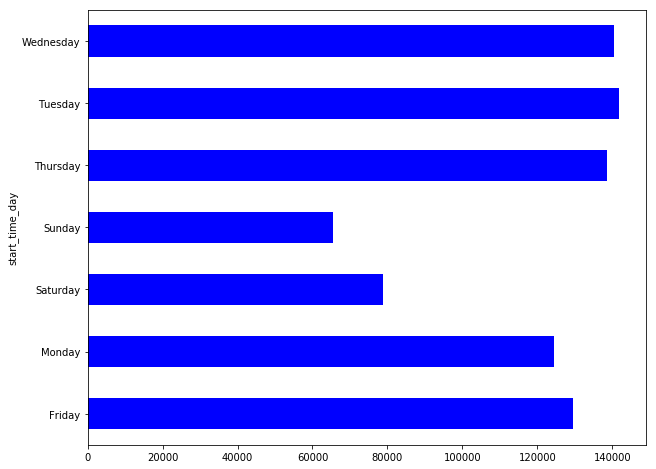

In [68]:
df_all.groupby('start_time_day').size().plot(kind='barh', figsize=(10, 8), color='blue')

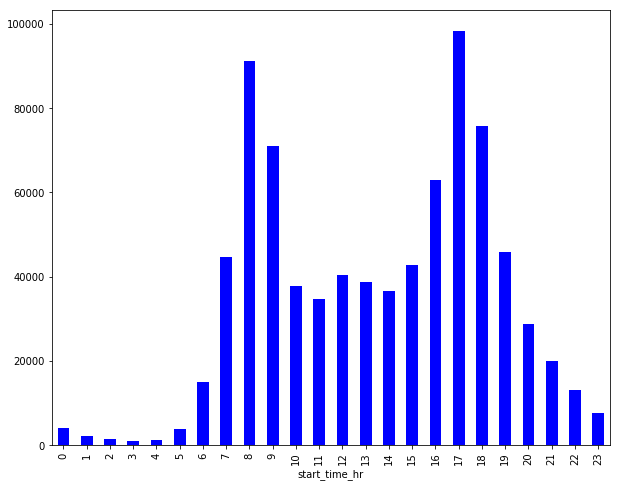

In [24]:
df_all.groupby('start_time_hr').size().plot(kind='bar', figsize=(10, 8), color='blue')

# 3. What are the most common starting and end stations?

Take-away 3: From below figures, the most common starting station is San Francisco Ferry Building (Harry Bridges Plaza), and the end station is San Francisco Caltrain (Townsend St at 4th St)

Text(0.5,1,u'Count of Rides Starting from Docks')

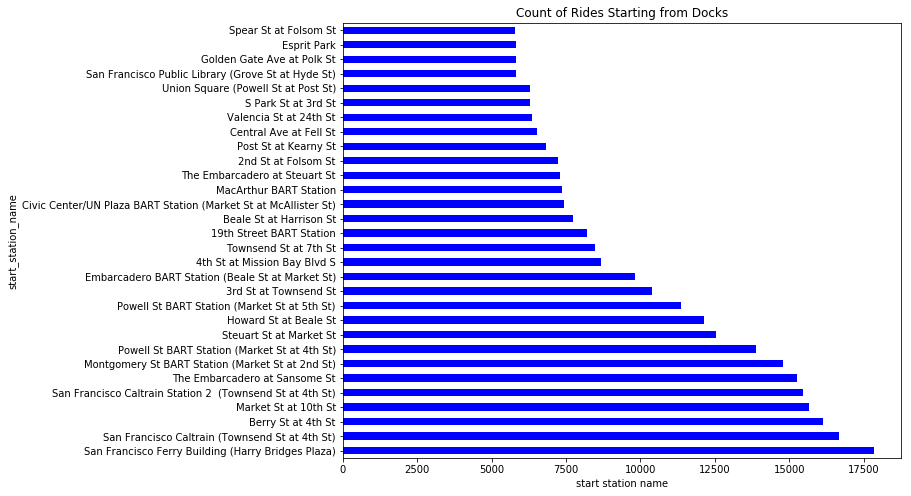

In [66]:
df_all.groupby('start_station_name').size().sort_values(ascending=False).head(30).plot(kind='barh', color='blue', figsize=(10, 8))
plt.xlabel('count of rides')
plt.xlabel('start station name')
plt.title('Count of Rides Starting from Docks')

Text(0.5,1,u'Count of Rides Ending at Docks')

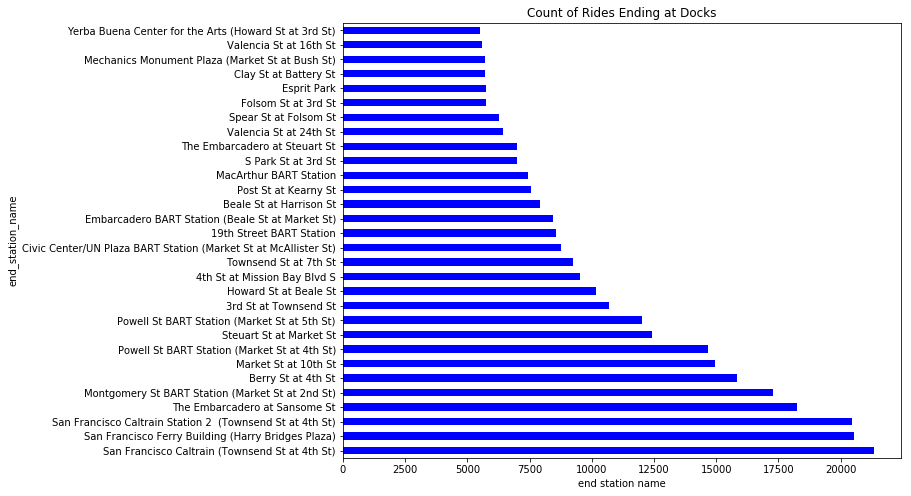

In [67]:
df_all.groupby('end_station_name').size().sort_values(ascending=False).head(30).plot(kind='barh', color='blue', figsize=(10, 8))
plt.xlabel('count of rides')
plt.xlabel('end station name')
plt.title('Count of Rides Ending at Docks')

# 4. User population descriptions
Take-away 4: From data, we can conclude that subscriber is the majority of users.

In [10]:
df_all['user_type'].value_counts()

Subscriber    692350
Customer      126814
Name: user_type, dtype: int64

Text(0.5,1,u'Count of Rides by user type for the first half year of 2018')

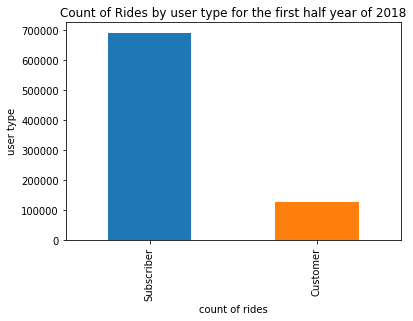

In [11]:
df_all['user_type'].value_counts().plot(kind='bar')
plt.xlabel("count of rides")
plt.ylabel("user type")
plt.title("Count of Rides by user type for the first half year of 2018")